In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
class FeedForward_OneLayer(torch.nn.Module):
  
  def __init__(self, input_size, hidden_size, output_dim):
    super(FeedForward_OneLayer, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(self.hidden_size, output_dim)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    z1 = self.fc1(x)
    a1 = self.relu(z1)
    z2 = self.fc2(a1)
    a2 = self.sigmoid(z2)
    return a2

In [ ]:
x_train, y_train = make_blobs(n_samples = 300, centers = 2, cluster_std = 3.5, random_state = 100)
x_test, y_test = make_blobs(n_samples = 30, centers = 2, cluster_std = 3.5, random_state = 100)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
Y_test = torch.FloatTensor(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([300, 2])
torch.Size([300])


In [ ]:
model = FeedForward_OneLayer(2, 5, 1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
print(model)

FeedForward_OneLayer(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Epoch 40000: train loss: 0.15420979261398315


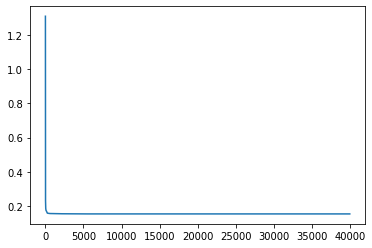

In [ ]:
model.train()
epoch = 40000
Loss = []
for i in range(epoch):
  optimizer.zero_grad()
  y_pred = model(x_train)
  loss = criterion(y_pred.squeeze(), y_train)
  Loss.append(loss.item())
  loss.backward()
  optimizer.step()
print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
plt.plot(np.arange(len(Loss)),Loss)

xx.shape:  (348, 276)
torch.Size([96048, 1])


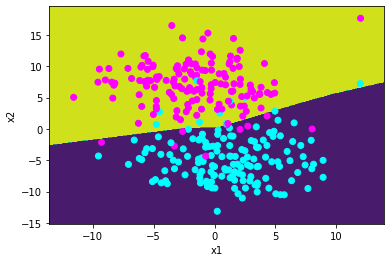

In [ ]:
X = x_train
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print('xx.shape: ', xx.shape)
Xn = (np.c_[xx.ravel(), yy.ravel()])
Xn = torch.FloatTensor(Xn)
P = model(Xn)
P = torch.round(P)
PP = P.detach().numpy()
PP = PP.reshape(xx.shape)
print(P.shape)
# t = [10 if y_train[i] == 0 else 1 for i in range(np.shape(y_train)[0])]
plt.contourf(xx, yy, PP, cmap = 'viridis')
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, cmap = 'cool')

xx.shape:  (256, 177)
torch.Size([45312, 1])


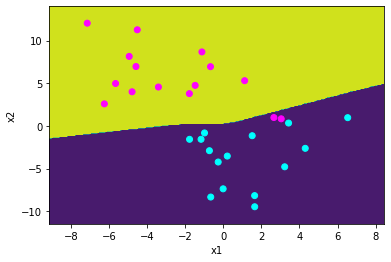

In [ ]:
X = x_test
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print('xx.shape: ', xx.shape)
Xn = (np.c_[xx.ravel(), yy.ravel()])
Xn = torch.FloatTensor(Xn)
P = model(Xn)
P = torch.round(P)
PP = P.detach().numpy()
PP = PP.reshape(xx.shape)
print(P.shape)
# t = [10 if y_train[i] == 0 else 1 for i in range(np.shape(y_train)[0])]
plt.contourf(xx, yy, PP, cmap = 'viridis')
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, cmap = 'cool')

In [ ]:
P_train = model(x_train).reshape(300)
P_train = torch.round(P_train)
c = 0
for i in range(300):
  if int(P_train[i]) == int(y_train[i]):
    c += 1
print("Train accuracy:", c/300)

Train accuracy: 0.94


In [ ]:
P_test = model(x_test).reshape(30)
P_test = torch.round(P_test)
c = 0
for i in range(30):
  if int(P_test[i]) == int(y_test[i]):
    c += 1
print("Test accuracy:", c/30)

Train accuracy: 0.9333333333333333
